In [1]:
%matplotlib inline

import numpy as np
import time
from numba import njit, prange
import matplotlib.pyplot as plt

In [2]:
x = np.array([6, 5, 3, 0, 2, 1, 5, 1, 5, 1, 0, 7, 4, 6, 5, 3, 0])

#    steps  count      sequence
# 0      2      2        [1, 5]
# 1      2      2        [3, 0]
# 2      2      2        [5, 1]
# 3      2      2        [5, 3]
# 4      2      2        [6, 5]
# 5      3      2     [1, 5, 1]
# 6      3      2     [5, 3, 0]
# 7      3      2     [6, 5, 3]
# 8      4      2  [6, 5, 3, 0]

In [3]:
@njit(parallel=True, fastmath=True)
def naive_overlap(x, print_output=True):
    for steps in prange(2, x.shape[0]-1):
        for i in range(x.shape[0]-steps+1):
            count = 0
            for j in range(i, x.shape[0]-steps+1):  # Upper triangular
                increment = True
                for k in prange(steps):
                    if x[i+k] != x[j+k]:
                        increment = False
                        break
                if increment:
                    count += 1
            if print_output and count >= 2:
                print(steps, count, x[i:i+steps])

In [4]:
naive_overlap(x)

2 2 [6 5]
2 2 [5 3]
2 2 [3 0]
2 2 [1 5]
2 2 [5 1]
3 2 [6 5 3]
3 2 [5 3 0]
3 2 [1 5 1]
4 2 [6 5 3 0]


In [ ]:
inp = np.random.randint(0, 100, size=10**7)

timing = []
for n in range(6,16):
    inx = int(2**n)
    start = time.time()
    naive_overlap(inp[:inx], print_output=False)
    stop = time.time()-start
    timing.append([inx, stop])
    print(inx, stop)
    
# 64 0.5668342113494873
# 128 0.0008769035339355469
# 256 0.004457950592041016
# 512 0.038243770599365234
# 1024 0.2919931411743164
# 2048 2.2470579147338867
# 4096 20.254921197891235
# 8192 149.0846300125122
# 16384 1151.8504710197449
# 32768 9227.93028998375

64 0.5668342113494873
128 0.0008769035339355469
256 0.004457950592041016
512 0.038243770599365234
1024 0.2919931411743164
2048 2.2470579147338867
4096 20.254921197891235
8192 149.0846300125122
16384 1151.8504710197449
32768 9227.93028998375


In [2]:
x = np.array([
    [64, 0.5668342113494873],
    [128, 0.0008769035339355469],
    [256, 0.004457950592041016],
    [512, 0.038243770599365234],
    [1024, 0.2919931411743164],
    [2048, 2.2470579147338867],
    [4096, 20.254921197891235],
    [8192, 149.0846300125122],
    [16384, 1151.8504710197449],
    [32768, 9227.93028998375]
])

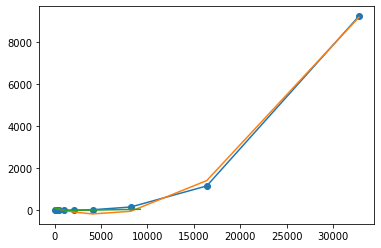

In [8]:
a = np.polyfit(x[:, 0], x[:, 1], 2)
b = np.poly1d(a)
plt.plot(x[:, 0], x[:, 1], "-o")
plt.plot(x, b(x))

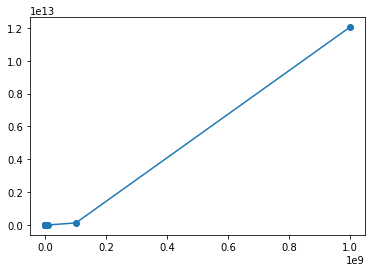

In [14]:
x = 10**np.arange(10)
plt.plot(x, b(x), "-o")
#plt.plot(x, b(x))

In [17]:
b([300_000_000])/60/60/24/365

array([34376.59053064])